# High School Student's Examination Performance and Demographic Data from Three U.S. Schools

## Dataset Description

#### This dataset contains academic performance and demographic information for high school students from three U.S. schools. It includes grades in subjects like Practical score, Viva score, and Exam score, along with demographic details such as Parental level of education, gender, and ethnicity. The data offers insights into the factors influencing student performance and potential disparities across different demographic groups and schools.

### Step 1: import required packages/ requirements

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

### Step 2: Preprocess the Data

In [3]:
# Load the training data
df1 = pd.read_csv("train.csv")
df1.head(5)

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81


In [4]:
df1.shape

(31999, 9)

In [5]:
# Check for missing values
df1.isnull().sum()

Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
exam score                     0
dtype: int64

In [6]:
# finding for no.of males and females
df1['gender'].value_counts()

gender
female    16031
male      15968
Name: count, dtype: int64

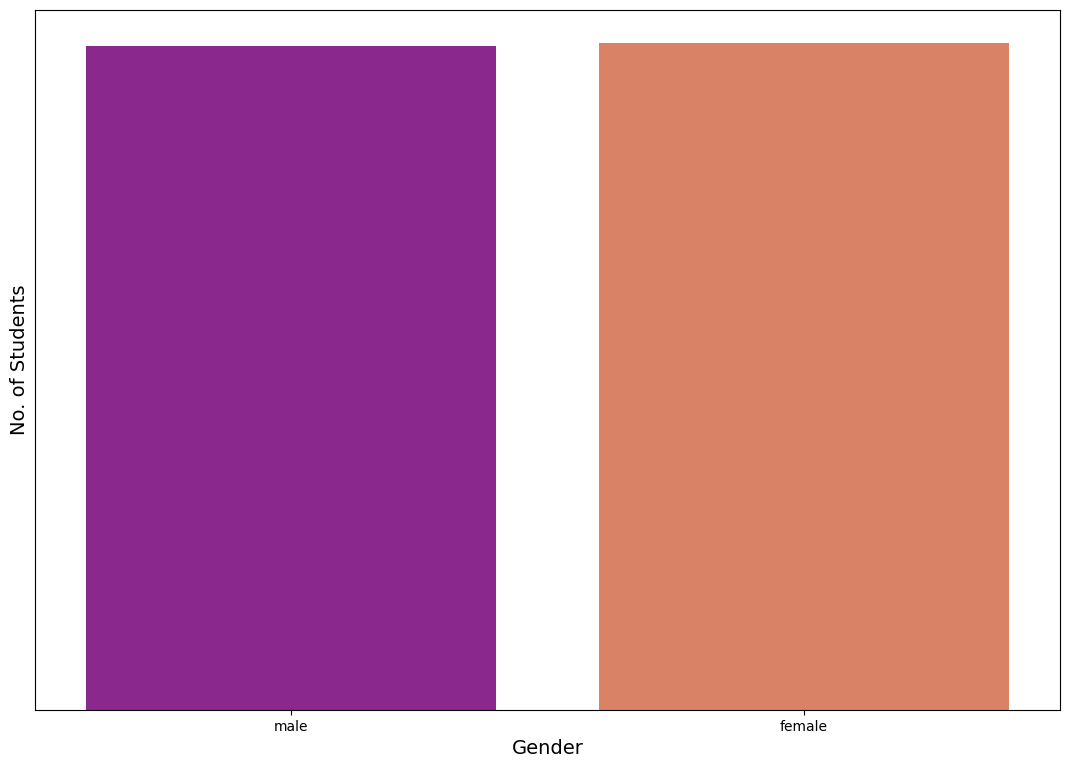

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(45, 20))

plt.subplot(2, 3, 3)
sns.countplot(x='gender', hue='gender', data=df1, palette='plasma')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('No. of Students', fontsize=14)
plt.yticks([])
plt.show()

In [7]:
# checking no.of students in each section
df1['Section'].value_counts()

Section
Section C    10323
Section D     8214
Section B     6408
Section E     4555
Section A     2499
Name: count, dtype: int64

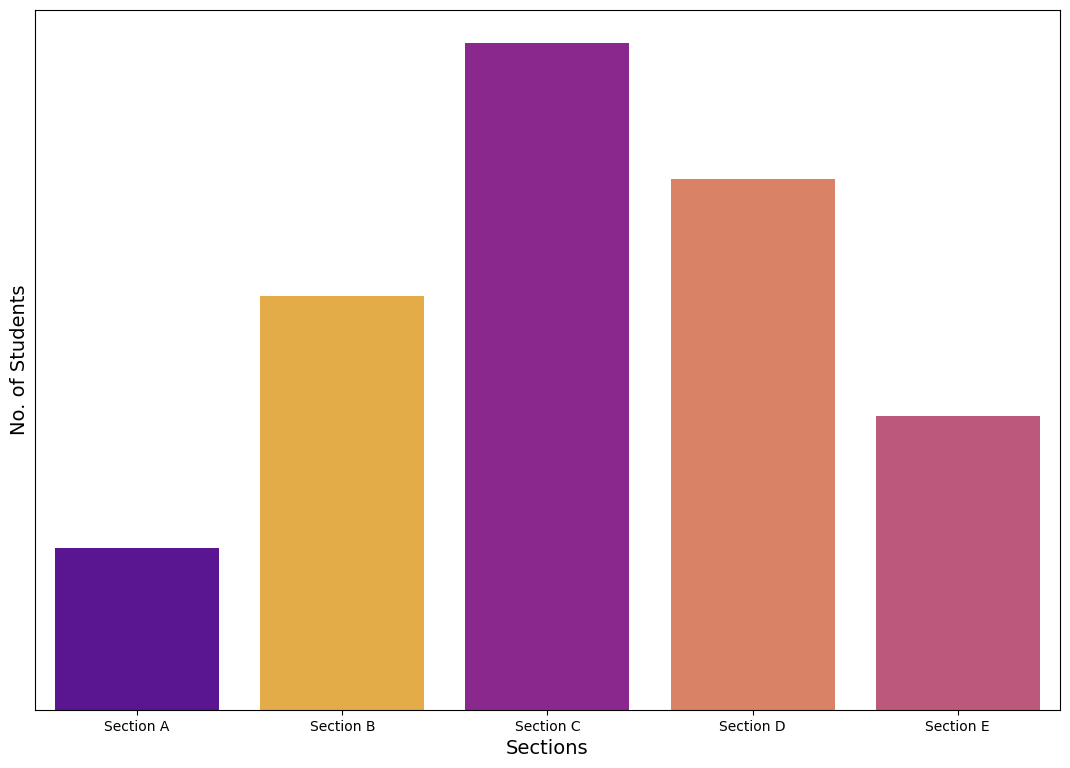

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(45, 20))

plt.subplot(2, 3, 3)
sns.countplot(x='Section', hue='Section', data=df1, palette='plasma', order=['Section A', 'Section B', 'Section C', 'Section D', 'Section E'])
plt.xlabel('Sections', fontsize=14)
plt.ylabel('No. of Students', fontsize=14)
plt.yticks([])
plt.show()

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Roll no                      31999 non-null  object
 1   test preparation             31999 non-null  object
 2   gender                       31999 non-null  object
 3   parental level of education  31999 non-null  object
 4   lunch                        31999 non-null  object
 5   Section                      31999 non-null  object
 6   practical score              31999 non-null  int64 
 7   viva score                   31999 non-null  int64 
 8   exam score                   31999 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.2+ MB


In [9]:
df1.isnull().sum()

Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
exam score                     0
dtype: int64

In [10]:
df1.describe()

,practical score,viva score,exam score
count,31999.000000,31999.000000,31999.000000
mean,67.839870,70.375168,69.139598
std,15.229898,14.092764,15.009974
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.000000,70.000000
75%,80.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


### Step 3: Feature Engineering

In [11]:
df1.head()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81


In [12]:
column_names = df1.columns.tolist()
print(column_names)

['Roll no', 'test preparation ', 'gender', 'parental level of education', 'lunch', 'Section', 'practical score', 'viva score', 'exam score']


##### Convert categorical variables into numerical ones using techniques like one-hot encoding.

In [13]:
# One-hot encoding categorical variables
data = pd.get_dummies(df1, columns=[ 'gender', 'parental level of education', 'lunch', 'Section'])

# Display the first few rows of the modified training data
print(data.head())

# Define features and target variable
X = data.drop(columns=['Roll no', 'exam score'])
y = data['exam score']

     Roll no test preparation   practical score  viva score  exam score  \
0  EXA000001              none               70          73          70   
1  EXA000002              none               55          54          52   
2  EXA000003              none               56          46          43   
3  EXA000004              none               35          47          41   
4  EXA000005              none               87          92          81   

   gender_female  gender_male  parental level of education_associate's degree  \
0          False         True                                           False   
1          False         True                                           False   
2          False         True                                           False   
3           True        False                                           False   
4           True        False                                           False   

   parental level of education_bachelor's degree  \
0         

### Step 4: Model Training

#### Split the data into features and target variables and train a model.

In [14]:
# Inspect the data for any non-numeric values
print(data.dtypes)

Roll no                                           object
test preparation                                  object
practical score                                    int64
viva score                                         int64
exam score                                         int64
gender_female                                       bool
gender_male                                         bool
parental level of education_associate's degree      bool
parental level of education_bachelor's degree       bool
parental level of education_high school             bool
parental level of education_master's degree         bool
parental level of education_some college            bool
parental level of education_some high school        bool
lunch_free/reduced                                  bool
lunch_standard                                      bool
Section_Section A                                   bool
Section_Section B                                   bool
Section_Section C              

In [15]:
print(data.isnull().sum())  # Check for missing values

Roll no                                           0
test preparation                                  0
practical score                                   0
viva score                                        0
exam score                                        0
gender_female                                     0
gender_male                                       0
parental level of education_associate's degree    0
parental level of education_bachelor's degree     0
parental level of education_high school           0
parental level of education_master's degree       0
parental level of education_some college          0
parental level of education_some high school      0
lunch_free/reduced                                0
lunch_standard                                    0
Section_Section A                                 0
Section_Section B                                 0
Section_Section C                                 0
Section_Section D                                 0
Section_Sect

In [16]:
print(data.apply(lambda x: x.unique()))  # Check unique values in each column

Roll no                                           [EXA000001, EXA000002, EXA000003, EXA000004, E...
test preparation                                                                  [none, completed]
practical score                                   [70, 55, 56, 35, 87, 80, 65, 66, 67, 89, 99, 7...
viva score                                        [73, 54, 46, 47, 92, 82, 71, 66, 88, 85, 83, 5...
exam score                                        [70, 52, 43, 41, 81, 85, 74, 62, 76, 71, 86, 8...
gender_female                                                                         [False, True]
gender_male                                                                           [True, False]
parental level of education_associate's degree                                        [False, True]
parental level of education_bachelor's degree                                         [False, True]
parental level of education_high school                                               [False, True]


In [17]:
# Replace 'none' with NaN
data.replace('none', pd.NA, inplace=True)

In [18]:
data.fillna(0, inplace=True)  # Fill NaNs with 0
data.head(10)

,Roll no,test preparation,practical score,viva score,exam score,gender_female,gender_male,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,Section_Section A,Section_Section B,Section_Section C,Section_Section D,Section_Section E
0,EXA000001,0,70,73,70,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False
1,EXA000002,0,55,54,52,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False
2,EXA000003,0,56,46,43,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True
3,EXA000004,0,35,47,41,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False
4,EXA000005,0,87,92,81,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
5,EXA000006,0,80,82,85,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True
6,EXA000007,completed,65,71,74,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False
7,EXA000008,0,66,66,62,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False
8,EXA000009,completed,67,71,76,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False
9,EXA000010,0,70,71,71,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False


In [19]:
# now Replace 'completed' with NaN
data.replace('completed', pd.NA, inplace=True)

data.head(10)

,Roll no,test preparation,practical score,viva score,exam score,gender_female,gender_male,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,Section_Section A,Section_Section B,Section_Section C,Section_Section D,Section_Section E
0,EXA000001,0,70,73,70,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False
1,EXA000002,0,55,54,52,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False
2,EXA000003,0,56,46,43,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True
3,EXA000004,0,35,47,41,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False
4,EXA000005,0,87,92,81,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
5,EXA000006,0,80,82,85,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True
6,EXA000007,<NA>,65,71,74,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False
7,EXA000008,0,66,66,62,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False
8,EXA000009,<NA>,67,71,76,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False
9,EXA000010,0,70,71,71,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False


In [20]:
data.fillna(1, inplace=True)  # Fill NaNs with 1
data.head(10)

C:\Users\kanis\AppData\Local\Temp\ipykernel_9524\249362515.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(1, inplace=True)  # Fill NaNs with 1


,Roll no,test preparation,practical score,viva score,exam score,gender_female,gender_male,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,Section_Section A,Section_Section B,Section_Section C,Section_Section D,Section_Section E
0,EXA000001,0,70,73,70,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False
1,EXA000002,0,55,54,52,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False
2,EXA000003,0,56,46,43,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True
3,EXA000004,0,35,47,41,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False
4,EXA000005,0,87,92,81,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
5,EXA000006,0,80,82,85,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True
6,EXA000007,1,65,71,74,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False
7,EXA000008,0,66,66,62,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False
8,EXA000009,1,67,71,76,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False
9,EXA000010,0,70,71,71,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False


In [33]:
# One-hot encoding categorical variables
data2 = pd.get_dummies(df1, columns=[ 'gender', 'parental level of education', 'lunch', 'Section'])

# Display the first few rows of the modified training data
print(data2.head())

# Define features and target variable
X = data2.drop(columns=['Roll no', 'exam score'])
y = data2['exam score']

     Roll no test preparation   practical score  viva score  exam score  \
0  EXA000001              none               70          73          70   
1  EXA000002              none               55          54          52   
2  EXA000003              none               56          46          43   
3  EXA000004              none               35          47          41   
4  EXA000005              none               87          92          81   

   gender_female  gender_male  parental level of education_associate's degree  \
0          False         True                                           False   
1          False         True                                           False   
2          False         True                                           False   
3           True        False                                           False   
4           True        False                                           False   

   parental level of education_bachelor's degree  \
0         

In [35]:
columns = data2.columns.tolist()
print(columns)

['Roll no', 'test preparation ', 'practical score', 'viva score', 'exam score', 'gender_female', 'gender_male', "parental level of education_associate's degree", "parental level of education_bachelor's degree", 'parental level of education_high school', "parental level of education_master's degree", 'parental level of education_some college', 'parental level of education_some high school', 'lunch_free/reduced', 'lunch_standard', 'Section_Section A', 'Section_Section B', 'Section_Section C', 'Section_Section D', 'Section_Section E']


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate and print the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 237.8767970207842


### Step 4: Load Test Data and Make Predictions

#### Load the test data, preprocess it similarly, and make predictions.

In [50]:
# check the columns
print(test_data.columns) 

Index(['test preparation ', 'practical score', 'viva score', 'gender_female',
       'gender_male', 'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'Section_Section A', 'Section_Section B',
       'Section_Section C', 'Section_Section D', 'Section_Section E',
       'Predicted Exam score', 'Roll no'],
      dtype='object')


In [47]:
# Load the test data
test_data = pd.read_csv('train.csv')  # Ensure this is the correct file

# Keep the 'Roll no' column aside
roll_no_column = test_data['Roll no']

# Preprocess the test data (same as training data)
test_data = pd.get_dummies(test_data, columns=['gender', 'parental level of education', 'lunch', 'Section'])

# Ensure the test data has the same columns as the training data
missing_cols = set(X_train.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0

# Ensure the order of columns matches
test_data = test_data[X_train.columns]

# Ensure that all data in test_data is numeric
test_data = test_data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Make predictions
test_data['Predicted Exam score'] = model.predict(test_data)

# Re-add the 'Roll no' column
test_data['Roll no'] = roll_no_column

# Create the submission file
submission = test_data[['Roll no', 'Predicted Exam score']]
submission.to_csv('submission.csv', index=False)

In [49]:
# Load the submission file to check its format
submission = pd.read_csv('submission.csv')
print(submission.head(10))

     Roll no  Predicted Exam score
0  EXA000001             74.918333
1  EXA000002             60.950000
2  EXA000003             49.420000
3  EXA000004             48.250000
4  EXA000005             76.286667
5  EXA000006             81.300000
6  EXA000007             81.577143
7  EXA000008             59.982000
8  EXA000009             75.941000
9  EXA000010             71.470000


### Conclusion

##### In this analysis, we utilized a dataset containing detailed information on the academic performance and demographic background of high school students from three U.S. schools. The dataset included key columns such as Roll No, Gender, Section, Parental Level of Education, Lunch status, Test Preparation Course completion, and scores from Practical, Viva, and Exam tests.

##### The primary task was to predict students' Exam scores based on these features. By analyzing these variables, we aimed to understand how different factors, such as gender, parental education, and participation in test preparation courses, influence students' academic outcomes. The insights gained from this analysis can help educators and policymakers identify areas for targeted interventions, aiming to improve academic performance and equity among students.

##### Further analysis could involve refining prediction models or exploring additional factors to enhance the accuracy of predictions and deepen our understanding of the determinants of student success.